<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Statistik im Data Science Bereich 2 (Streumaße)</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

Wir kommen nun zu den Streuungsmaßen. Sie geben uns Einsicht in die Verteilung der Daten.

In [1]:
import pandas as pd
import os

path = os.path.join("..", "..", "_data", "titanic.csv")

In [2]:
df = pd.read_csv(path, decimal=".", sep=",", header=0, index_col=False)

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Spannweite

Die Spannweite (auch "Range" genannt) ist ein einfaches, aber nützliches Maß der Streuung in der Statistik, das die Differenz zwischen dem größten und dem kleinsten Wert in einer Datenmenge angibt. Sie bietet einen groben Überblick über die Variabilität der Daten, indem sie die extreme Ausbreitung der Werte darstellt.
Definition der Spannweite

Die Spannweite berechnet sich durch die folgende Formel:

Spannweite=Maximalwert−Minimalwert

Die Spannweite gibt also an, wie weit die Daten auseinanderliegen, jedoch ohne dabei die Streuung oder Verteilung der Werte zwischen diesen Extrempunkten zu berücksichtigen.

Eigenschaften der Spannweite:
* Empfindlich gegenüber Ausreißern: Da die Spannweite nur die Extremwerte betrachtet, kann sie stark von Ausreißern beeinflusst werden.
* Einfache Berechnung: Die Spannweite ist leicht zu berechnen und schnell verständlich.
* Begrenzte Aussagekraft: Die Spannweite allein bietet keinen detaillierten Einblick in die Verteilung der Daten, da sie keine Informationen über die Verteilung innerhalb der Werte liefert (im Gegensatz zu anderen Maßzahlen wie dem Interquartilsabstand).

#### Beispiel 1

Nehmen wir an, wir haben die folgenden Daten:
$$2, 4, 6, 8, 10, 12, 14, 16, 18, 20.$$
Dann ist:
* Maximalwert: 20
* Minimalwert: 2

Die Spannweite beträgt somit:
Spannweite=20−2=18

Das bedeutet, dass die Werte in dieser Datenreihe sich über eine Spannweite von 18 erstrecken.

#### Beispiel 2

Wenn wir derselben Datenreihe einen Ausreißer hinzufügen, z.B. 100:

$$2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 100.$$
Dann haben wir:
* Maximalwert: 100
* Minimalwert: 2

Nun beträgt die Spannweite:
* Spannweite=100−2=98

In Kombination des realtiv niedrigen Mittelwertes ($\bar{x}=19.091$) kann man hier somit vermuten, dass ein Ausreißer dabei ist.

Im Vergleich: Bei Beispiel 1 ist der Mittelwert $\bar{x}=11.0$, was in etwa die halbe Spannweite wiederspiegelt. Also sind die Daten kompakter, als in Beispiel 2.

In [4]:
# Die Anwendung in pandas ist sehr einfach und intuitiv

range_of_df = df.max(numeric_only=True, skipna=True) - df.min(numeric_only=True, skipna=True)

In [5]:
range_of_df

pclass        2.0000
survived      1.0000
age          79.8333
sibsp         8.0000
parch         9.0000
fare        512.3292
body        327.0000
dtype: float64

---

## Interquartilsabstand

Der Interquartilsabstand (IQR), der die Differenz zwischen dem dritten und ersten Quartil darstellt, ist ein Maß für die Streuung der mittleren 50% der Daten.

Der Interquartilsabstand (IQR) ist ein wichtiges Maß für die Streuung einer Datenmenge in der Statistik. Im Gegensatz zur Spannweite, die die gesamte Verteilung betrachtet, fokussiert der IQR nur auf die mittleren 50 % der Daten, was ihn robuster gegenüber Ausreißern macht. Er gibt den Bereich an, in dem sich der Großteil der Daten ohne Extremwerte befindet.
Definition des Interquartilsabstands (IQR)

Der IQR ist die Differenz zwischen dem dritten Quartil (Q3) und dem ersten Quartil (Q1):
* IQR=Q3−Q1

Der Interquartilsabstand umfasst also die mittleren 50 % der Daten. Datenpunkte außerhalb dieses Bereichs können als potenzielle Ausreißer betrachtet werden.

Eigenschaften des IQR:
* Robustheit gegenüber Ausreißern: Da der IQR nur die mittleren 50 % der Daten betrachtet, ist er unempfindlich gegenüber extrem hohen oder niedrigen Werten, die bei der Spannweite das Ergebnis stark beeinflussen könnten.
* Nützlich für die Identifikation von Ausreißern: Datenpunkte, die außerhalb des Bereichs Q1−1.5×IQR und Q3+1.5×IQR liegen, werden oft als Ausreißer identifiziert (siehe später Boxplot).

#### Beispiel 1

Betrachten wir die folgende Datenreihe:
$$12, 13, 1, 3, 10, 4, 7, 8, 9, 18, 14, 15.$$

Berechnung der Quartile liefert:
* Q1 (erstes Quartil): 5.5 (25 % der Daten sind kleiner oder gleich 5.5)
* Q3 (drittes Quartil): 13.5 (75 % der Daten sind kleiner oder gleich 13.5)

Der Interquartilsabstand (IQR) beträgt:
IQR=13.5−5.5=8

Das bedeutet, dass sich die mittleren 50 % der Daten zwischen 5.5 und 13.5 befinden. Werte außerhalb dieses Bereichs könnten Ausreißer sein.
Beispiel mit Ausreißern:

Wenn wir dieser Datenreihe einen Ausreißer hinzufügen, z.B. 30:
$$12, 13, 1, 3, 10, 4, 7, 8, 9, 18, 14, 15, 30.$$
* Q1 ändert sich zu 5.5 und Q3 bei 14.5, IQR=14.5-5.5=9.
* IQR ändert sich nur wenig, obwohl der Ausreißer hinzugefügt wurde. Dies zeigt, dass der IQR robust gegenüber Ausreißern ist.

In [6]:
# Der IQR kann wie folgt berechnet werden

Q1 = df.quantile(0.25, axis=0, numeric_only=True, interpolation='midpoint')
Q3 = df.quantile(0.75, axis=0, numeric_only=True, interpolation='midpoint')

IQR = Q3 - Q1

---

## Varianz und Standardabweichung

Die Standardabweichung und die Varianz sind zwei der wichtigsten Maßzahlen in der Statistik, die die Streuung oder Variabilität von Daten um ihren Mittelwert beschreiben. Beide Maßzahlen werden häufig verwendet, um zu verstehen, wie weit die einzelnen Datenpunkte von ihrem Durchschnitt entfernt sind.


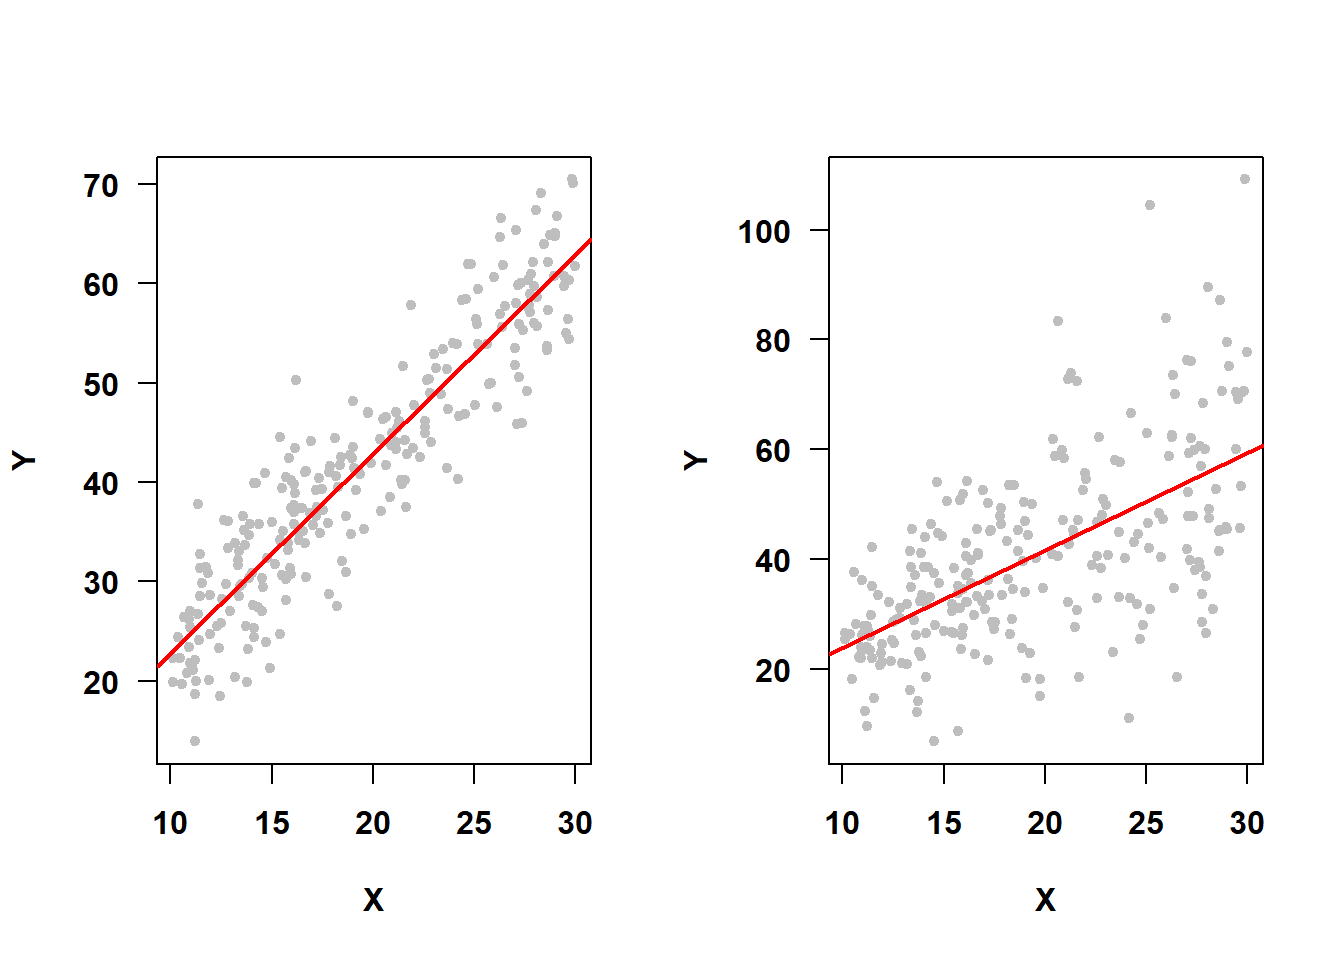

(from https://www.bookdown.org/rwnahhas/RMPH/RMPH_files/figure-html/mlr-nonconstvar-1.png)

#### Definition der Varianz

Die Varianz misst die durchschnittliche quadratische Abweichung der Datenpunkte vom Mittelwert. Sie wird mit der folgenden Formel berechnet:
$$\text{Var}(X)=\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}$$
Dabei ist:
* $X$: Das Dataset, i.e. $X=(x_1, x_2, \ldots, x_n)$
* $n$: Anzahl der Datenpunkte
* $x_i$: Die einzelnen Datenpunkte
* $\bar{x}$: Der Mittelwert

Die Varianz gibt an, wie stark die Werte in einer Datenmenge um den Mittelwert schwanken. Ein kleiner Wert bedeutet, dass die Datenpunkte nahe beieinander und um den Mittelwert konzentriert sind. Ein großer Wert zeigt, dass die Daten über einen größeren Bereich verteilt sind.

Bemerkung: Die obige Formel gilt nur, wenn die Daten die Grundgesamtheit respräsentieren. Ansonsten (für Stichproben) wird die Formel
$$
\text{Var}(X)=\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}
$$
verwendet.
**Wichtig:** Wir verwenden (außer anders spezifiziert) für die folgenden Beispiele immer die Formel für die Grundgesamtheit.

##### Steinerscher Verschiebungssatz
Es gibt auch eine Vereinfachung für die Varianzformel. Dafür sei $\mu=1/n \sum_{i=1}^{n} x_i$.
\begin{align*}
	\text{Var}(X) &= \frac{1}{n} \sum_{i=1}^{n}(x_i-\mu)^2\\
	&= \frac{1}{n}\sum_{i=1}^{n}\left( x_i^2 - 2 x_i \mu + \mu^2\right)\\
	&= \frac{1}{n}\sum_{i=1}^{n} x_i^2 - 
	2\mu\underbrace{\frac{1}{n}\sum_{i=1}^{n}x_i}_{\mu} + 
	\underbrace{\frac{1}{n}\sum_{i=1}^{n}\mu^2}_{\mu^2}\\
	&= \frac{1}{n}\sum_{i=1}^{n}x_i^2 - \mu^2\\
	&= -\mu^2 + \frac{1}{n} \sum_{i=1}^{n}x_i^2.
\end{align*}

#### Definition der Standardabweichung

Die Standardabweichung ist die Quadratwurzel aus der Varianz und gibt die durchschnittliche Abweichung der Datenpunkte vom Mittelwert an. Sie wird mit der folgenden Formel berechnet:

​$$\sigma(X)=\sqrt[2]{\text{Var}(X)} = \sqrt[2]{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}}$$

Die **Standardabweichung** wird häufig verwendet, da sie in **derselben Einheit** wie die Originaldaten ausgedrückt wird, während die **Varianz** in **quadrierten Einheiten** vorliegt. Dadurch ist die Standardabweichung leichter interpretierbar.

#### Eigenschaften von Varianz und Standardabweichung
Empfindlichkeit gegenüber Ausreißern: Beide Maßzahlen sind empfindlich gegenüber Ausreißern, da sie auf den quadratischen Abweichungen basieren, wodurch große Abweichungen stärker gewichtet werden.

#### Beispiel 1

Betrachten wir eine Datenreihe:
$$2, 4, 4, 4, 5, 5, 7, 9.$$

Um die Varianz bzw. die Standardabweichung zu bestimmen berechnen wir zuerst den Mittelwert:
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i = \frac{2+4+4+4+5+5+7+9}{8} = \frac{40}{8} = 5.$$

Nun berechnen wir die Varianz:

$$\text{Var}(X) = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2 = \frac{1}{8}\left((2-5)^2+(4-5)^2+(4-5)^2+(4-5)^2+(5-5)^2+(5-5)^2+(7-5)^2+(9-5)^2\right) = \frac{1}{8}\left(9+1+1+1+0+0+4+16\right)=4\, \text{EH}^2$$

Die dazugehörige Standardabweichung ist dann die Wurzel, i.e.
$$\sigma(X)=\sqrt{4} = 2\,\text{EH}.$$

In diesem Beispiel beträgt die Varianz 4, was bedeutet, dass die durchschnittliche quadratische Abweichung der Datenpunkte vom Mittelwert 4 beträgt. Die Standardabweichung von 2 gibt an, dass die Datenpunkte im Durchschnitt um 2 Einheiten vom Mittelwert abweichen.

Wie würde die Rechnung mit dem Steinerschen Verschiebungssatz aussehen?

Lösung?

### Beispiel 2

Berechne die Standardabweichung, für folgendes Dataset. Es repräsentiert das Ergebnis einer Umfrage, bei der die befragten Personen angaben, wie viele Urlaubstage sie dieses Jahr bereits verbraucht haben.
| Tage | Anzahl |
|------|--------|
| 21   | 5      |
| 14   | 10     |
| 25   | 40     |
| 31   | 49     |
| 35   | 30     |
| 21   | 16     |
| 29   | 50     |

Lösung?

#### Beispiel 3

Betrachten wir die Datenreihe $X$ mit den Parametern $a,b\in\mathbb{R}$. Wir wissen, dass der Mittelwert $\bar{x}=77.2$ ist und die Varianz $1183.16$ beträgt. Berechne die Werte $a$ und $b$.
$$X=(32, 111, 138, 28, 97, 89, 101, 51, a, b)$$

Lösung (Verwendung von Computerprogramm erlaubt)?

In [7]:
# Nun berechnen wir die Varianz

variance = df.var(numeric_only=True, skipna=True, axis=0) # Achtung, diese Funktion berechnet die Stichprobenvarianz, kann mit ddof geändert werden

In [8]:
variance

pclass         0.701969
survived       0.236250
age          207.748974
sibsp          1.085052
parch          0.749195
fare        2678.959738
body        9544.688567
dtype: float64

In [9]:
# Genauso kann die Standardabweichung berechnet werden

std = df.std(numeric_only=True, skipna=True, axis=0)

In [10]:
std

pclass       0.837836
survived     0.486055
age         14.413500
sibsp        1.041658
parch        0.865560
fare        51.758668
body        97.696922
dtype: float64

---

## Normalverteilung

Nun beschäftigen wir uns noch mit der Normalverteilung. Sie ist ein essentielles Tool in der Statistik und modelliert sehr viele (zufällige) Sachverhalte. Einige Beispiele aus dem Alltag:
* Körpergröße
* Gewicht
* IQ-Werte
* Notenverteilung
* Laufzeit von Prozessen

Außerdem ist sie auch in Gebrauch beim Normalisieren von Daten (siehe Normalisierung).

Die Normalverteilung, auch als **Gaußsche Verteilung** oder **Glockenkurve** bekannt, ist eine der wichtigsten Verteilungen in der Statistik. Sie beschreibt, wie sich die Werte einer Zufallsvariablen um einen Mittelwert herum verteilen, wobei die meisten Werte nahe am Mittelwert liegen und die Wahrscheinlichkeit für extremere Werte nach beiden Seiten abnimmt.

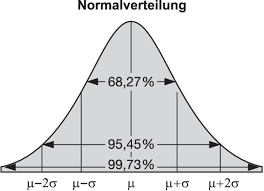

(from https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1iWPhC9cNM1uGHf6YzjJzWonw0HR3EYKMMg&s)

#### Eigenschaften der Normalverteilung

Die Normalverteilung hat folgende Eigenschaften:
* Symmetrisch: Die Normalverteilung ist symmetrisch um den Mittelwert.
* Mittelwert, Median und Modus sind identisch.
* Glockenförmige Kurve: Die Verteilung hat die Form einer Glocke, wobei die Breite und Höhe der Glocke von der Standardabweichung abhängen. Je größer die Standardabweichung, desto steiler und schmaler die Kurve.
* Asymptotisch: Die Enden der Verteilung nähern sich der x-Achse an, berühren sie aber nie. 
* $68-95-99.7$ Regel: Diese Regel beschreibt, dass:
    * $68 \%$ der Werte innerhalb einer Standardabweichung ($1 \sigma$) vom Mittelwert liegen.
    * $95 \%$ der Werte innerhalb von zwei Standardabweichungen ($2 \sigma$) liegen.
    * $99.7 \%$ der Werte innerhalb von drei Standardabweichungen ($3 \sigma$) liegen.

Definition der Funktion:

$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

wobei:
* $\mu$ ist der Mittelwert (Erwartungswert).
* $\sigma$ ist die Standardabweichung.

Eine spezielle Form der Normalverteilung ist die **Standardnormalverteilung**. Sie hat $\mu=0$ und $\sigma=1$.

#### Beispiel:

Angenommen, wir betrachten die Körpergröße einer Bevölkerung, die normalverteilt ist:
* Mittelwert $\mu=175\,\textrm{cm}$
* Standardabweichung $\sigma=10\, \textrm{cm}$

Berechne mit Hilfe bekannten Prozentwerte die Körpergröße Intervalle für eine Abweichung von $\pm 1, \pm 2, \pm 3$ Sigma.

Nach der $68-95-99.7$-Regel:
* $68 \%$ der Menschen haben eine Körpergröße zwischen 165 cm und 185 cm ($\pm 1 \sigma$)
* $95 \%$ der Menschen haben eine Körpergröße zwischen 155 cm und 195 cm ($\pm 2 \sigma$).
* $99.7 \%$ der Menschen haben eine Körpergröße zwischen 145 cm und 205 cm ($\pm 3 \sigma$).

Diese Verteilung der Körpergrößen ist ein typisches Beispiel für eine Normalverteilung, bei der die meisten Menschen Größen nahe am Mittelwert haben, während sehr große oder sehr kleine Größen seltener vorkommen.

In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

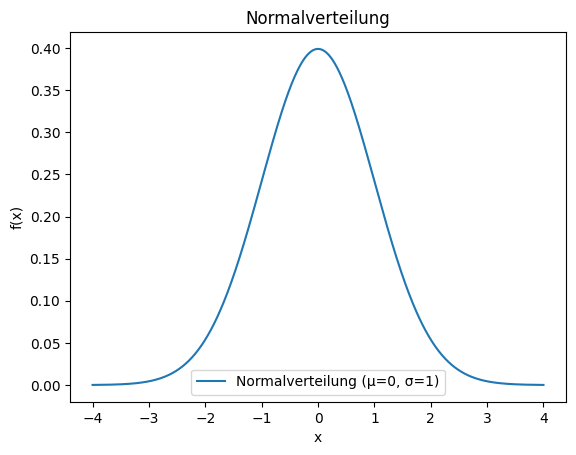

In [12]:
# Nun werden wir mit Normalverteilungen rechnen bzw. uns die Graphen ansehen

# Verschiedene Werte können hier getestet werden, zBsp.: IQ-Verteilung: mu=100, sigma=15
mu = 0
sigma = 1

z = np.linspace(-4, 4, 1000)
x = z * sigma + mu

y = norm.pdf(x, mu, sigma)

# Nun können wir uns die Verteilung ansehen

plt.plot(x, y, label=f'Normalverteilung (μ={mu}, σ={sigma})')
plt.title('Normalverteilung')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

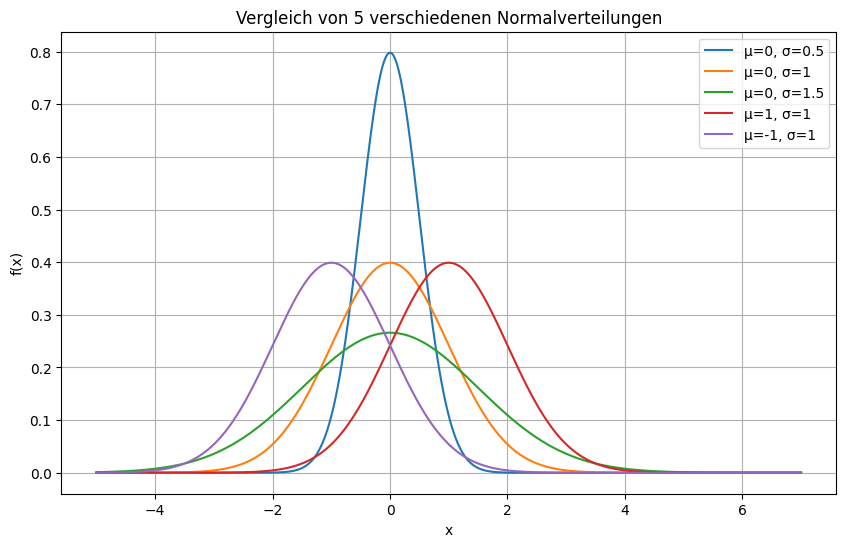

In [13]:
# Genauso können mehrere Normalverteilungen auf einem Graphen dargestellt werden
params = [
    {'mu': 0, 'sigma': 0.5},
    {'mu': 0, 'sigma': 1},
    {'mu': 0, 'sigma': 1.5},
    {'mu': 1, 'sigma': 1},
    {'mu': -1, 'sigma': 1}
]

z = np.linspace(-4,4, 1000)

max_mu = max([param['mu'] for param in params])
max_sigma = max([param['sigma'] for param in params])

x = z * max_sigma + max_mu

# Erstellen des Plots
plt.figure(figsize=(10, 6))

# Für jede Verteilung die PDF berechnen und plotten
for param in params:
    mu = param['mu']
    sigma = param['sigma']
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=f'μ={mu}, σ={sigma}')

plt.title('Vergleich von 5 verschiedenen Normalverteilungen')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.grid(True)
plt.show()

Wiederholung:

Was passiert bei der $z$-Normalisierung?

---

## Pandas Describe Methode

Viele statistische Größen können auch berechnet werden, indem die Werte in den Dataframes aggregiert werden.

Außerdem gibt es die Methode `describe()`, welche wichtige statistische Maße direkt liefert.

In [14]:
# Deskriptive Statistiken für alle (numerischen) Spalten
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [15]:
# Sollen alle Spalten verwendet werden (i.e. auch die nicht numerischen), so verwenden wir folgendes.
df.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [16]:
# Wir können natürlich auch die deskriptiven Statistiken mit der Aggregationsfunktion berechnen
summary_statistics = df.select_dtypes(include='number').agg(['mean', 'std', 'min', 'max', 'median'])

In [17]:
summary_statistics

,pclass,survived,age,sibsp,parch,fare,body
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000
median,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000


In [18]:
# Des weiteren können viele Statistiken auch mit dem stats Modul von scipy erstellt werden

from scipy import stats

# Berechnen der Summary Statistics für das Dataframe df mit scipy stats
summary_statistics_scipy = df.select_dtypes(include='number').apply(stats.describe, axis=0)

In [19]:
summary_statistics_scipy

,pclass,survived,age,sibsp,parch,fare,body
0,1309,1309,1309,1309,1309,1309,1309
1,"(1, 3)","(0, 1)","(nan, nan)","(0, 8)","(0, 9)","(nan, nan)","(nan, nan)"
2,2.294882,0.381971,NaN,0.498854,0.385027,NaN,NaN
3,0.701969,0.23625,NaN,1.085052,0.749195,NaN,NaN
4,-0.597961,0.485847,NaN,3.839814,3.664872,NaN,NaN
5,-1.314641,-1.763953,NaN,19.962194,21.454306,NaN,NaN


Wir sehen, dass hier der Output etwas anders ist. Die genaue Output Beschreibung findet man in der Dokumentation.

---

## Anscombe's Quartett

Ist Statistik wirklich ausreichend, um die Daten gut zu beschreiben?

**Nein**

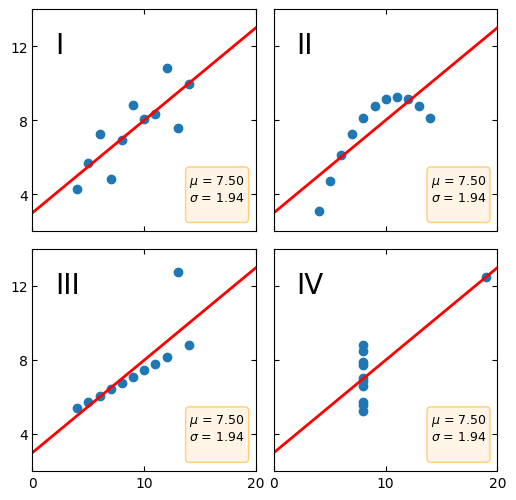

In [20]:
# from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n')
            #  f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

Wie wir sehen können, geben uns die Grafiken viel mehr Einblick in die gegebenen Daten, weswegen wir nun Visualisierungen besprechen werden.